In [1]:
import pandas
import os
import numpy
import matplotlib.pyplot as plt

In [2]:
path = r'E:\Master Data\traffic-matrices-anonymized-v2\traffic-matrices\all_in_one_complete_appended.csv'
df = pandas.read_csv(path)
df.sort_values('timestamp')

,timestamp,source,destination,bandwidth
1017803,2005-01-01 00:30:00,20,14,14.1511
1017746,2005-01-01 00:30:00,6,11,173.6889
1017745,2005-01-01 00:30:00,6,20,0.8889
1017744,2005-01-01 00:30:00,6,16,20.4000
1017743,2005-01-01 00:30:00,6,2,2303.7156
1017742,2005-01-01 00:30:00,6,7,644.2844
1017741,2005-01-01 00:30:00,6,22,60.5067
1017740,2005-01-01 00:30:00,6,3,235.9467
1017739,2005-01-01 00:30:00,6,5,0.8889
1017738,2005-01-01 00:30:00,6,1,87.8222


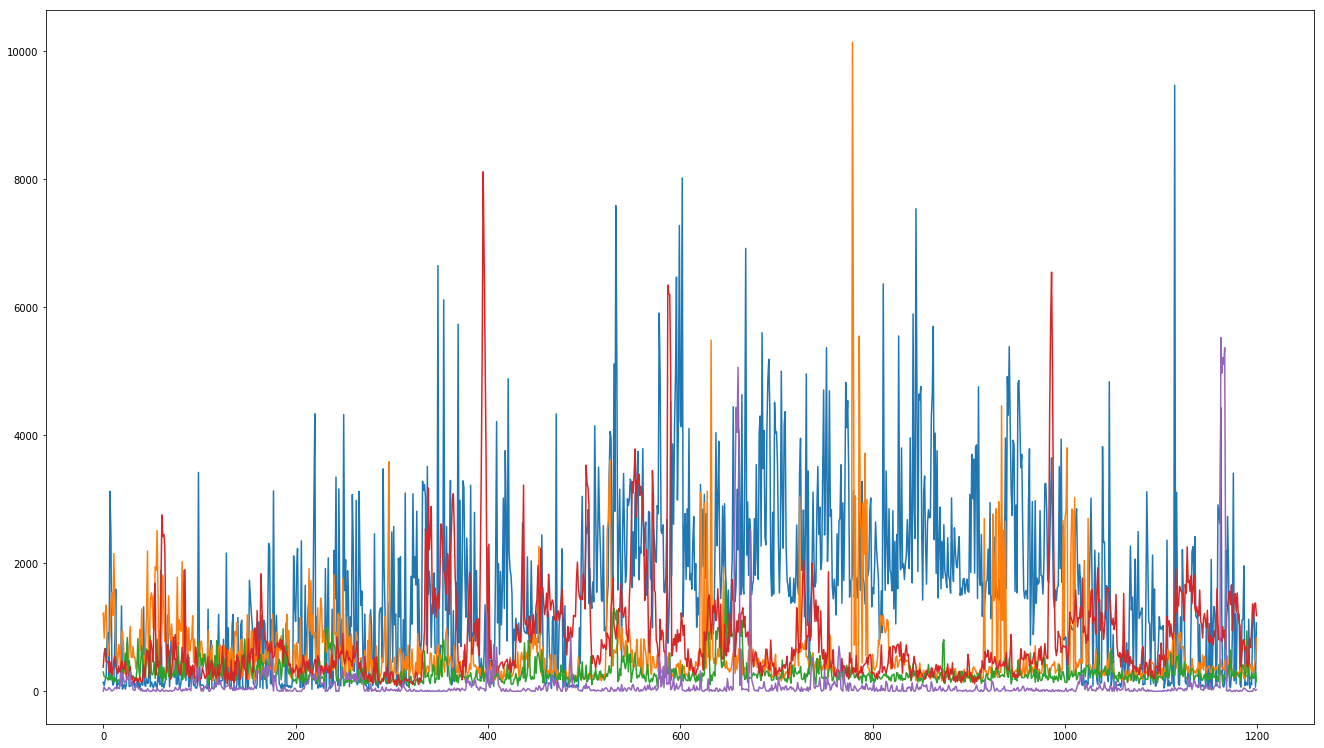

In [3]:
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sources = [1,2,3,4,5]
for source in sources:
    for destination in range(11,12):
        #print(source)
        #print(destination)
        ax1.plot(df[(df.source==source) & (df.destination==destination)][-1200:].reset_index(drop=True)['bandwidth'])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

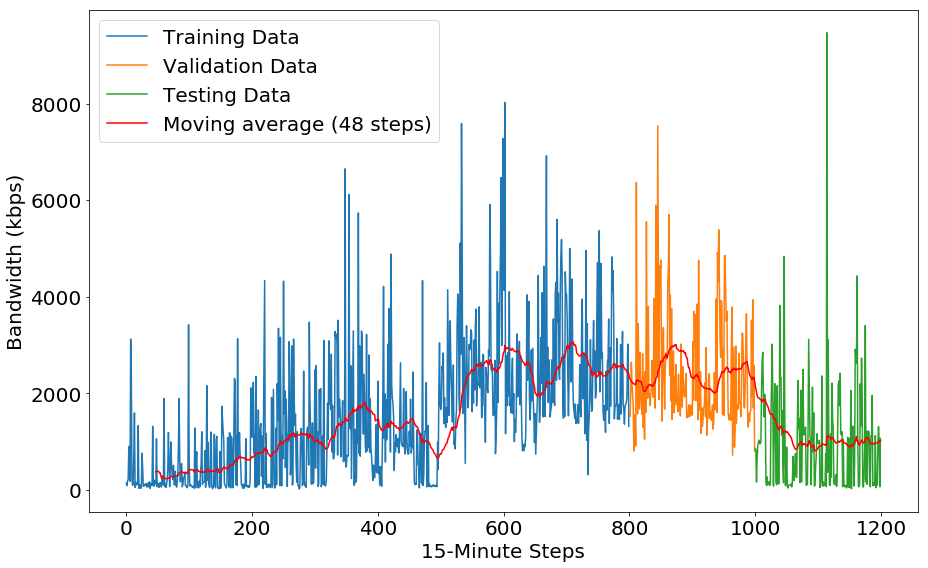

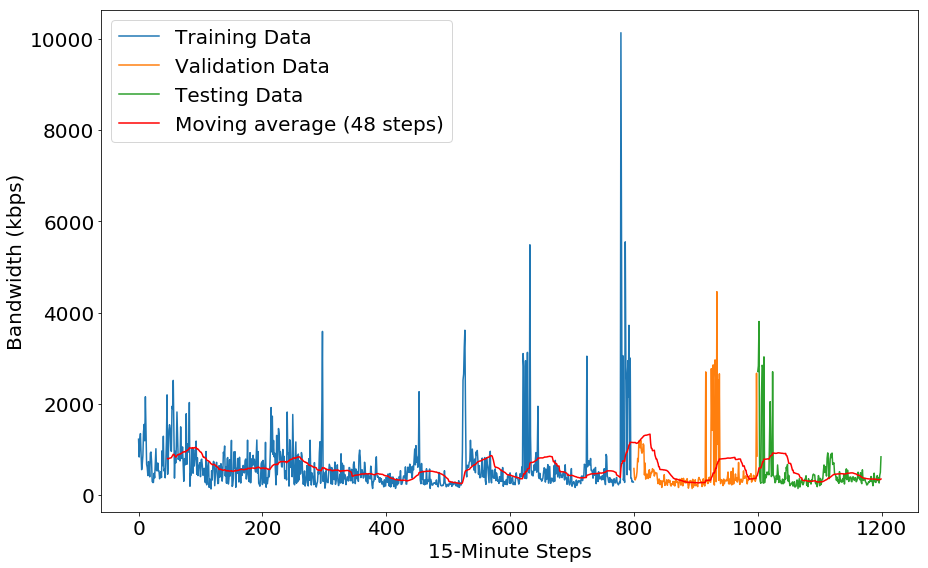

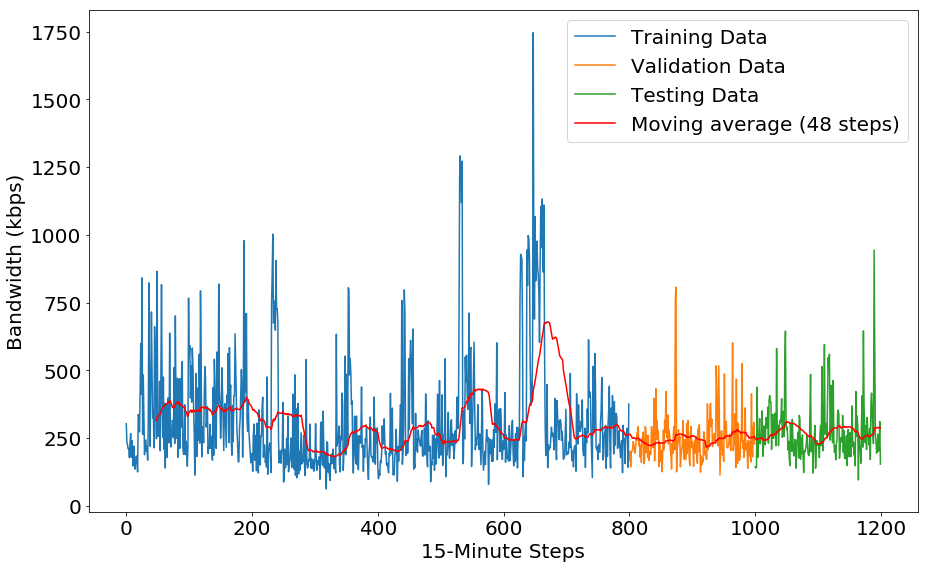

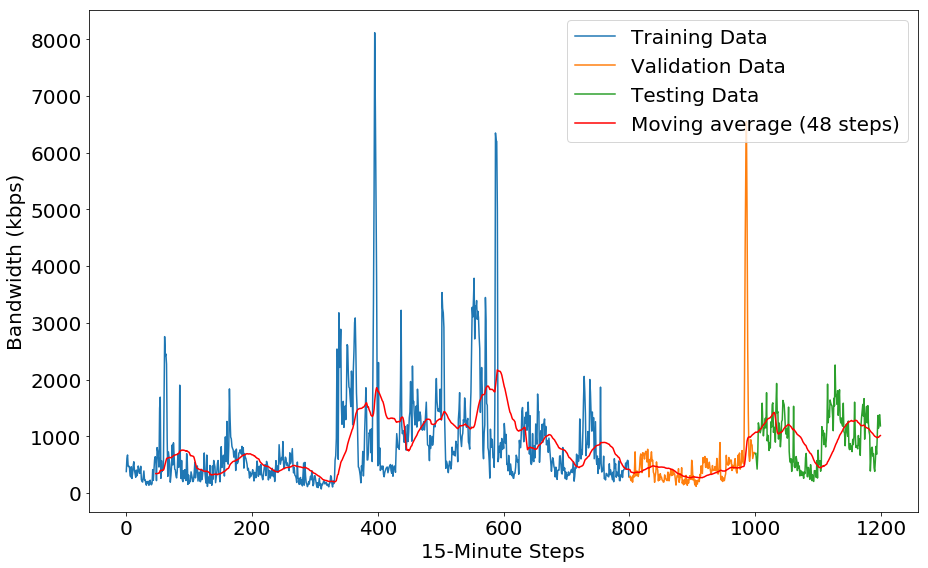

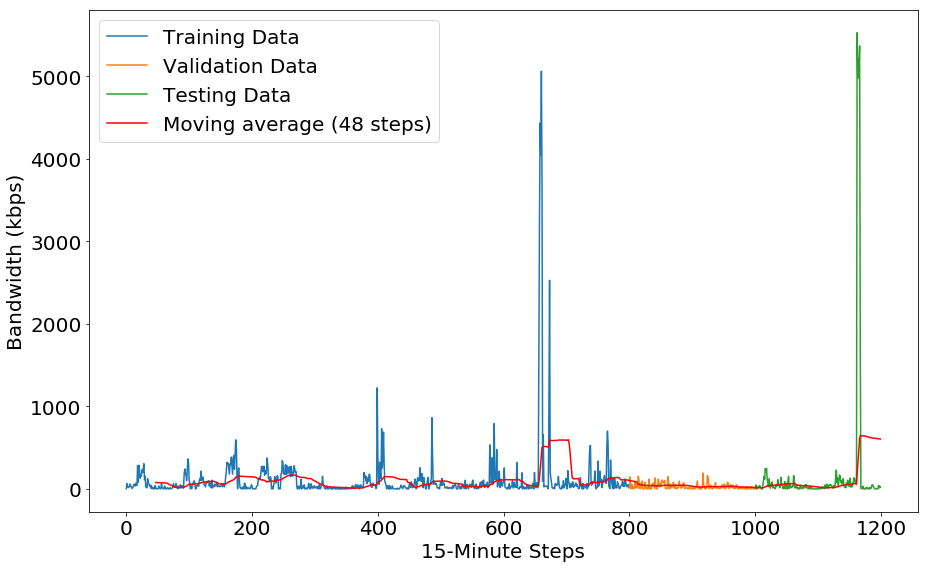

In [10]:
sources = [1,2,3,4,5]
for source in sources:
    fig, ax1 = plt.subplots()
    fig.set_size_inches(13, 8)
    ax1.tick_params(labelsize=20)
    for destination in range(11,12):
        #print(source)
        #print(destination)
        plot_data = df[(df.source==source) & (df.destination==destination)][-1200:].reset_index(drop=True)
        plot_data['ma'] = plot_data['bandwidth'].rolling(window=48).mean()
        ax1.plot(plot_data['bandwidth'][:800], label='Training Data')
        ax1.plot(plot_data['bandwidth'][800:1000], label='Validation Data')
        ax1.plot(plot_data['bandwidth'][1000:1200], label='Testing Data')
        ax1.plot(plot_data['ma'], label='Moving average (48 steps)', color = 'red')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.xlabel('15-Minute Steps', fontsize=20)
    plt.ylabel('Bandwidth (kbps)', fontsize=20)
    ax1.legend(fontsize=20)
    plt.tight_layout()
    plt.savefig('..\..\Documents\Thesis\Pictures\Traffic_Analysis\Traffic_rolling_average_{0}.pdf'.format(source))
    plt.savefig('..\..\Documents\Thesis\Pictures\Traffic_Analysis\Traffic_rolling_average_{0}.svg'.format(source))
    plt.show()

519.561909


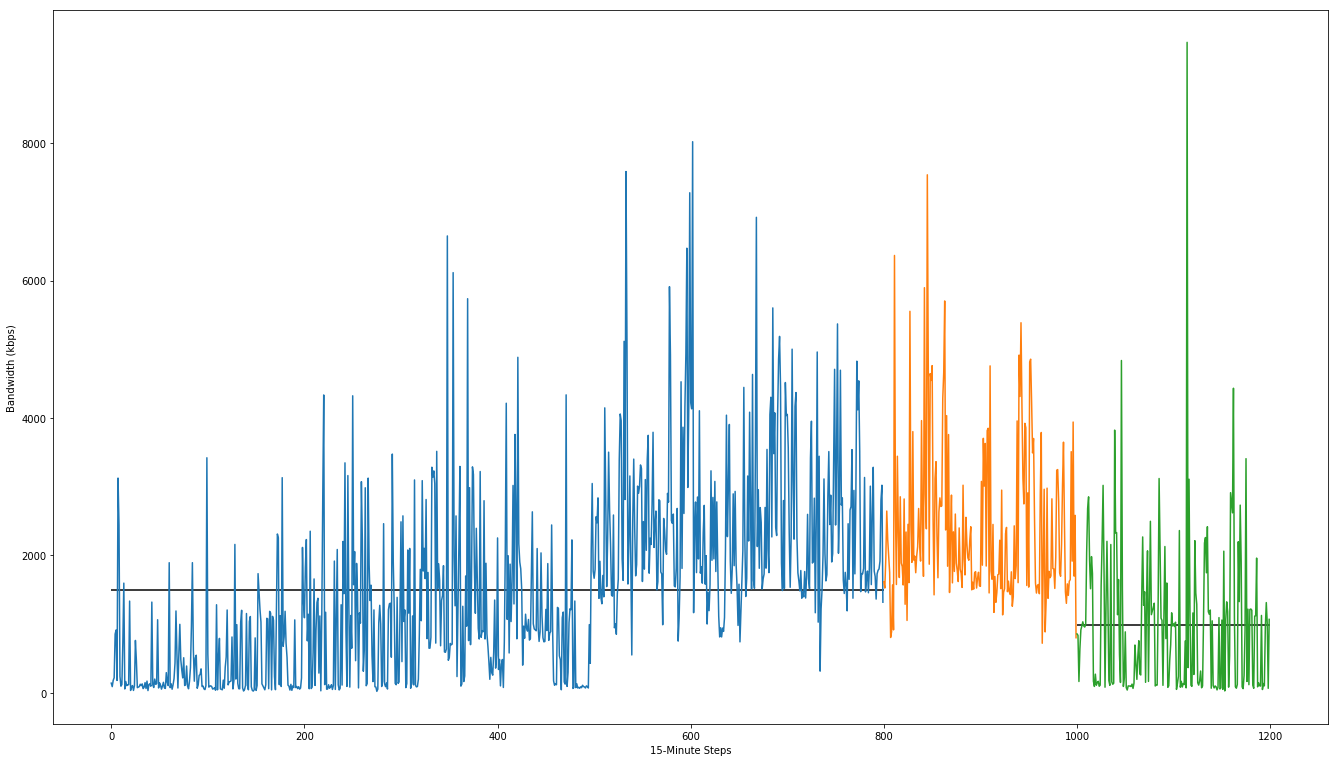

128.4833772500001


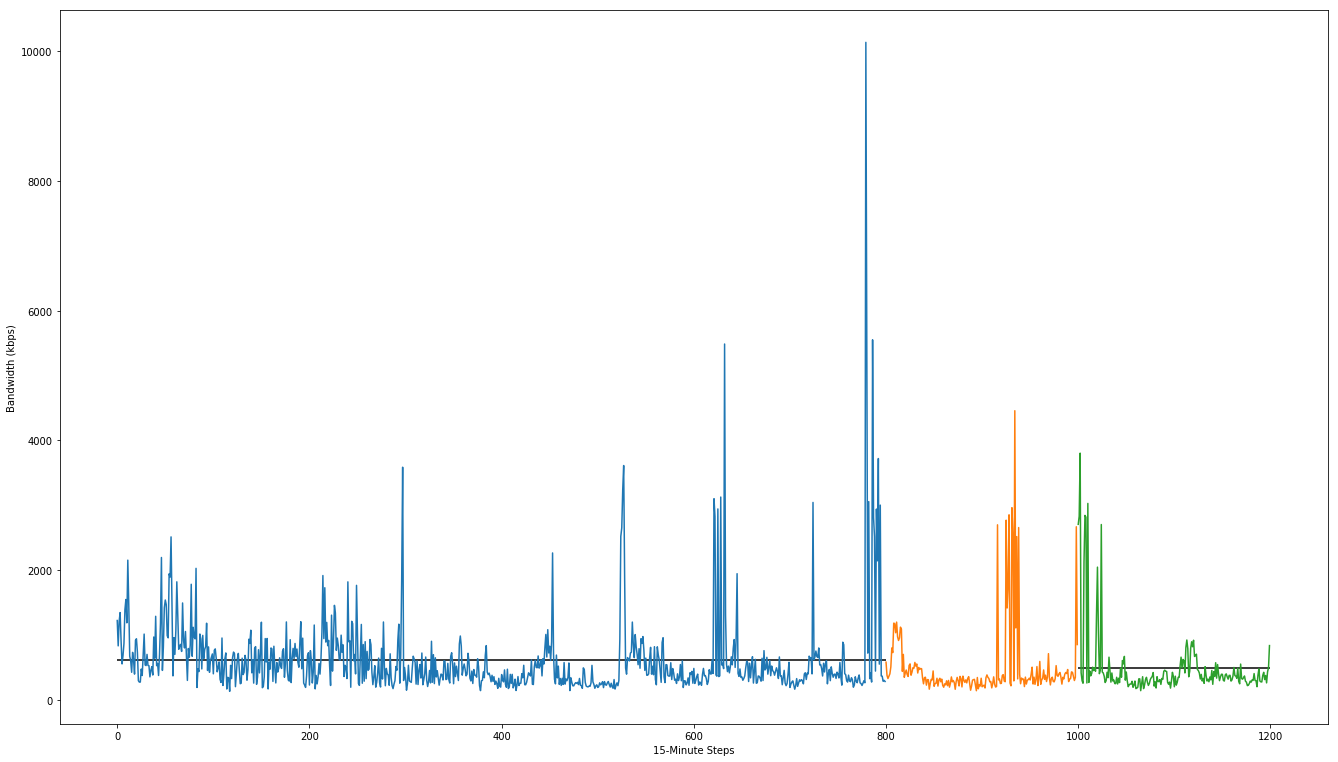

38.60749999999996


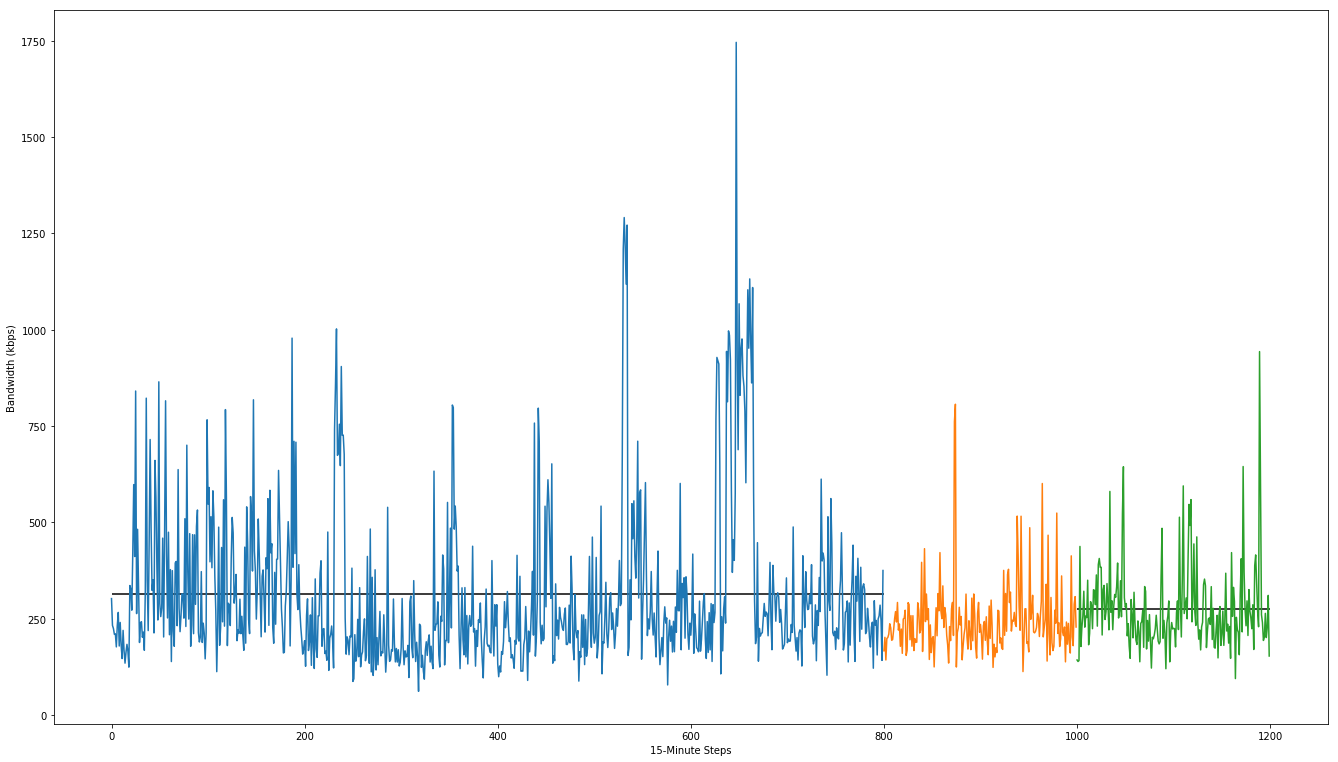

-132.1504021249999


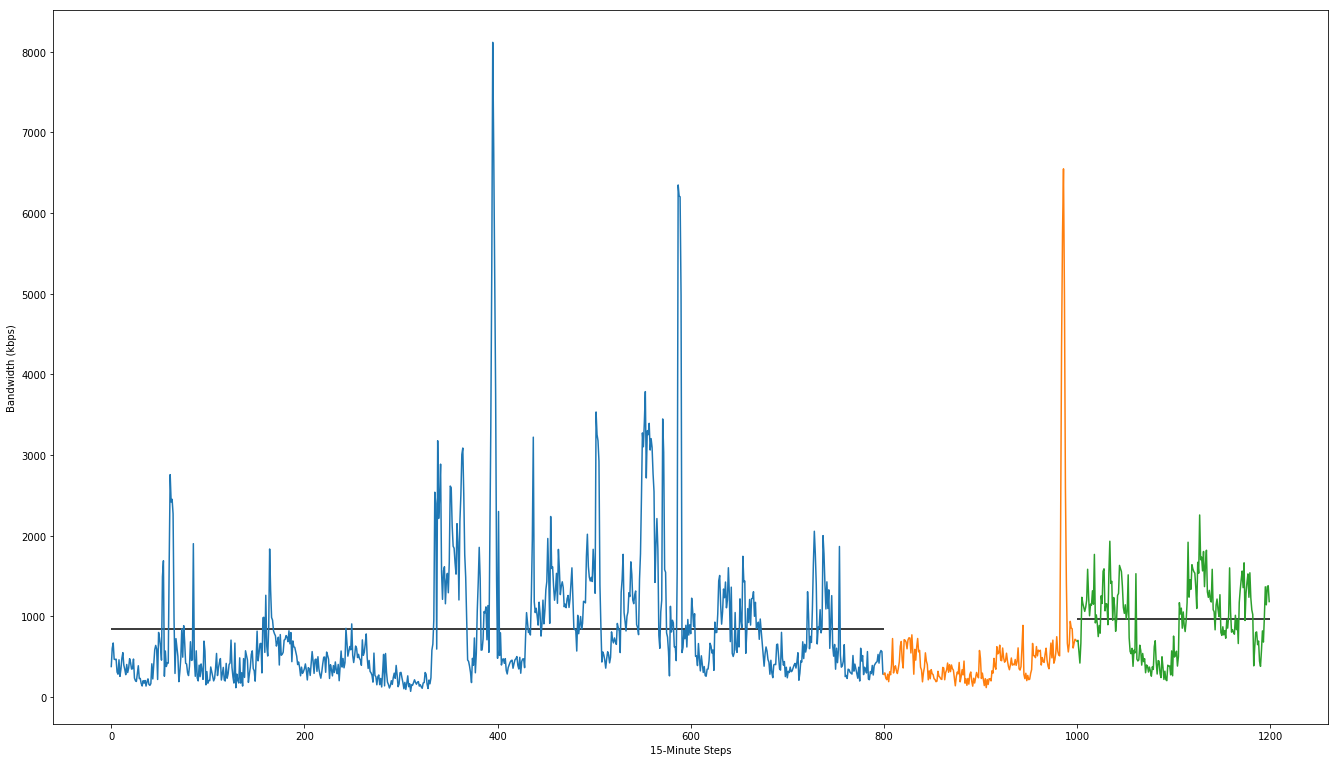

-70.02891199999998


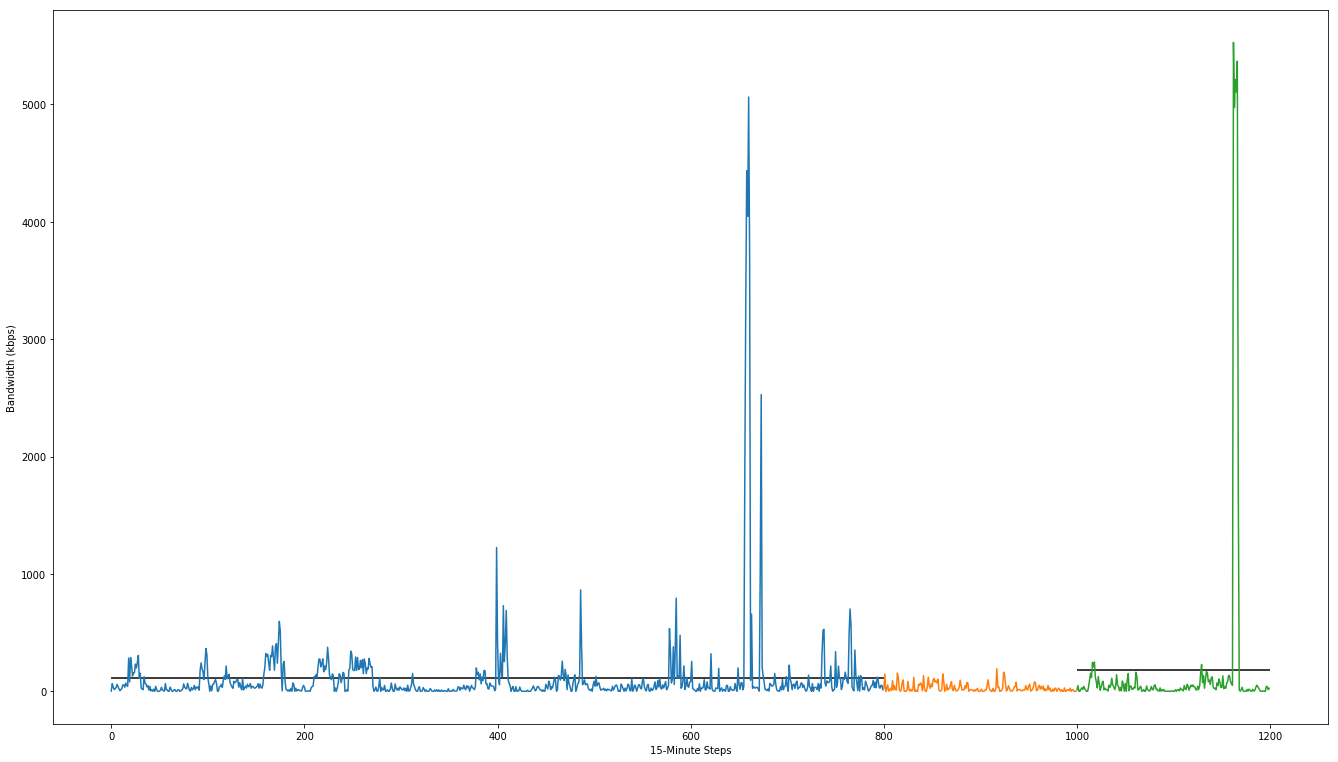

In [5]:
sources = [1,2,3,4,5]
for source in sources:
    fig, ax1 = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    for destination in range(11,12):
        #print(source)
        #print(destination)
        plot_data = df[(df.source==source) & (df.destination==destination)][-1200:].reset_index(drop=True)
        test_mean = plot_data['bandwidth'][-200:].mean()
        training_mean = plot_data['bandwidth'][-1200:-400].mean()
        mean_difference = training_mean - test_mean
        ax1.plot(plot_data['bandwidth'][:800], label='Training Data')
        ax1.plot(plot_data['bandwidth'][800:1000], label='Validation Data')
        ax1.plot(plot_data['bandwidth'][1000:1200], label='Testing Data')
        ax1.hlines(test_mean, 1000, 1200)
        ax1.hlines(training_mean, 0, 800)
        print(mean_difference)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.xlabel('15-Minute Steps')
    plt.ylabel('Bandwidth (kbps)')
    plt.savefig('..\..\Documents\Thesis\Pictures\Traffic_Analysis\Traffic_average_{0}.pdf'.format(source))
    plt.savefig('..\..\Documents\Thesis\Pictures\Traffic_Analysis\Traffic_average_{0}.svg'.format(source))
    plt.show()